In [1]:
#import library
import pandas as pd
import numpy as np

#import clean data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
'''Visualisasi Distribution Plot'''
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(12, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
'''Visualisasi Polynomial'''
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [8]:
'''Pembagian Training dan Testing Set'''
from sklearn.model_selection import train_test_split
x_data = df.drop('price', axis=1)
y_data = df['price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size=0.15, random_state=1)

print('Jumlah data training Skenario 1: ', x_train.shape[0],
      '\nJumlah data testing Skenario 1: ', x_test.shape[0])

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data,
                                                       test_size=0.1,
                                                       random_state=42)
print('\n\nJumlah data training Skenario 2: ', x_train1.shape[0],
      '\nJumlah data testing Skenario 2: ', x_test1.shape[0])

Jumlah data training Skenario 1:  170 
Jumlah data testing Skenario 1:  31


Jumlah data training Skenario 2:  180 
Jumlah data testing Skenario 2:  21


In [9]:
#call the model
from sklearn.linear_model import LinearRegression

lre = LinearRegression()
#fit the data
lre.fit(x_train1[['horsepower']], y_train1)

#calculate R^2
lre.score(x_test1[['horsepower']], y_test1)

0.6572835188314448

In [10]:
#do cross validation
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross

array([0.59015621, 0.44319613])

In [11]:
print ('Rata-rata nilai untuk CV=4 : ', Rcross.mean(), ' dan standar deviasinya: ',
      Rcross.std())

Rata-rata nilai untuk CV=4 :  0.5166761697127429  dan standar deviasinya:  0.07348004195771393


In [12]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [13]:
#Underfitting, Overfitting, and Model Selection
lre.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
yhat_train = lre.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [15]:
yhat_test=lre.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

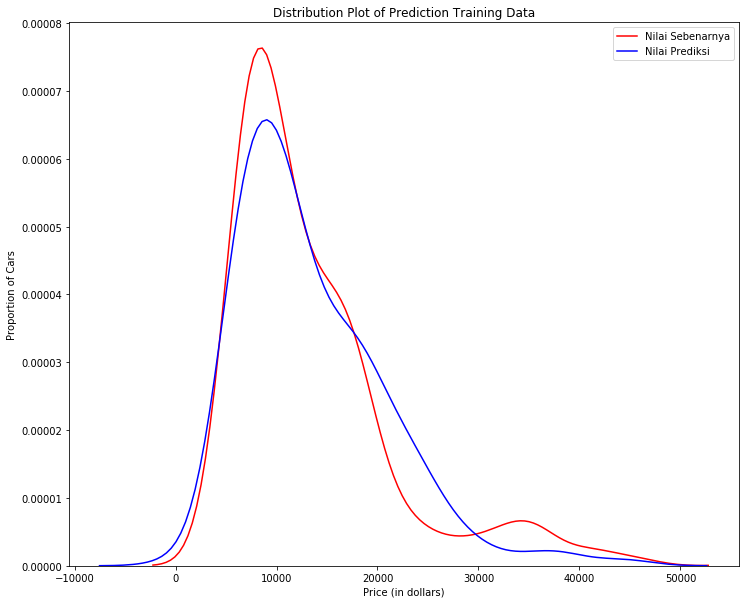

In [17]:
title = 'Distribution Plot of Prediction Training Data'
DistributionPlot(y_train, yhat_train, "Nilai Sebenarnya", "Nilai Prediksi", title)

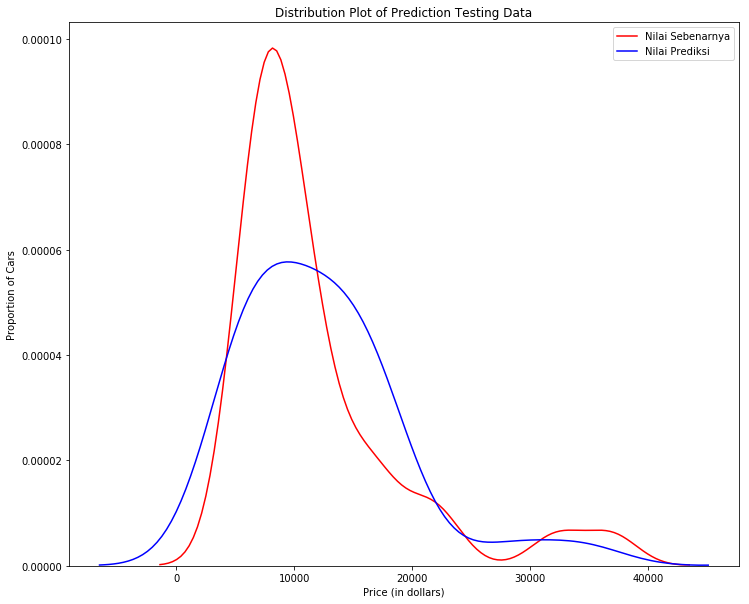

In [18]:
title = 'Distribution Plot of Prediction Testing Data'
DistributionPlot(y_test, yhat_test, "Nilai Sebenarnya", "Nilai Prediksi", title)

In [19]:
#terapkan Polynomial Features
from sklearn. preprocessing import PolynomialFeatures

In [20]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [21]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform (x_train2[['horsepower']])
x_test_pr = pr.fit_transform (x_test2[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [22]:
poly = LinearRegression()

In [23]:
poly.fit (x_train_pr, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.60486749,  7307.93778255, 12213.74792967, 18893.34125061,
       19996.06555028])

In [25]:
print ('Nilai Prediksi: ', yhat[0:4])
print ('Nilai Sebenarnya: ', y_test2[0:4].values)

Nilai Prediksi:  [ 6728.60486749  7307.93778255 12213.74792967 18893.34125061]
Nilai Sebenarnya:  [ 6295. 10698. 13860. 13499.]


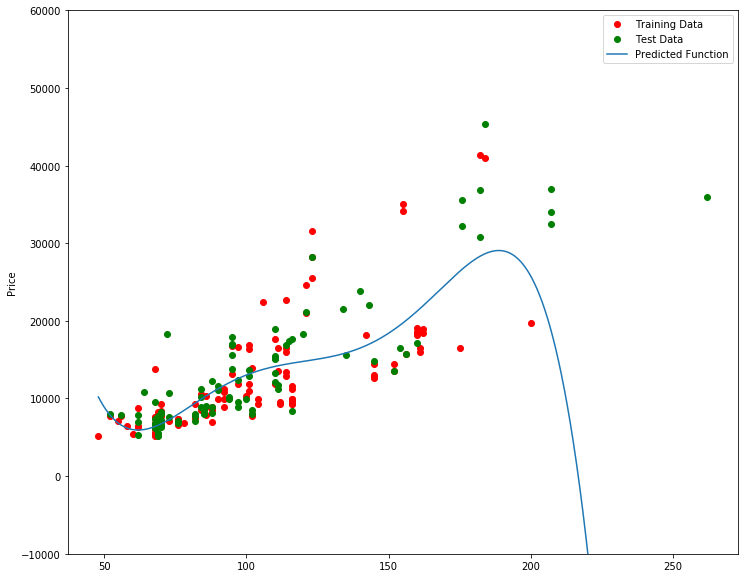

In [26]:
PollyPlot(x_train2[['horsepower']], x_test2[['horsepower']], y_train2, y_test2, poly,pr)

In [28]:
#nilai R^2 pada training
poly.score(x_train_pr, y_train2)

0.5567716898927437

In [29]:
#nilai R^2 pada testing
poly.score(x_test_pr, y_test2)

#negative tanda overfitting

-29.871035846525604

Text(3, 0.75, 'Maximum R^2 ')

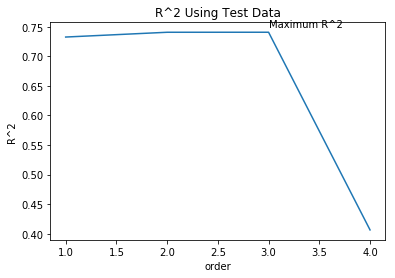

In [32]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train2[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test2[['horsepower']])    
    
    lre.fit(x_train_pr, y_train2)
    
    Rsqu_test.append(lre.score(x_test_pr, y_test2))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [33]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [34]:
interact(f, order=(0,6,1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [36]:
#menggunakan polynomial features orde 2
pr1 = PolynomialFeatures(degree=2)

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight',
                                      'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight',
                                      'engine-size', 'highway-mpg']])

In [37]:
x_train_pr1.shape

(170, 15)

In [39]:
#Model Linear Regression untu polynomial features
poly1=lre.fit(x_train_pr1,y_train)

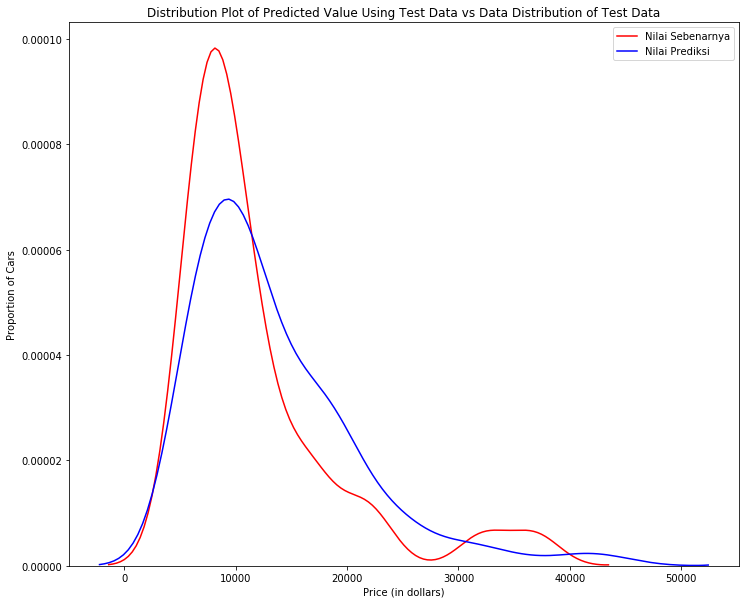

In [41]:
yhat_test1 = poly1.predict(x_train_pr1)
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Nilai Sebenarnya", "Nilai Prediksi", Title)

In [42]:
#Ridge Regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


In [43]:
from sklearn.linear_model import Ridge

In [44]:
RigeModel = Ridge (alpha=0.1)

RigeModel.fit(x_train_pr, y_train)

yhat = RigeModel.predict(x_test_pr)

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.43365e-17): result may not be accurate.
  overwrite_a=True).T


In [45]:
print('Prediksi: ', yhat[0:4])
print('Test Set: ', y_test[0:4].values)

Prediksi:  [ 9589.40015921  6514.23158088 10604.73769887  5137.02179828]
Test Set:  [ 9549.  6229. 10245.  7295.]


In [47]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

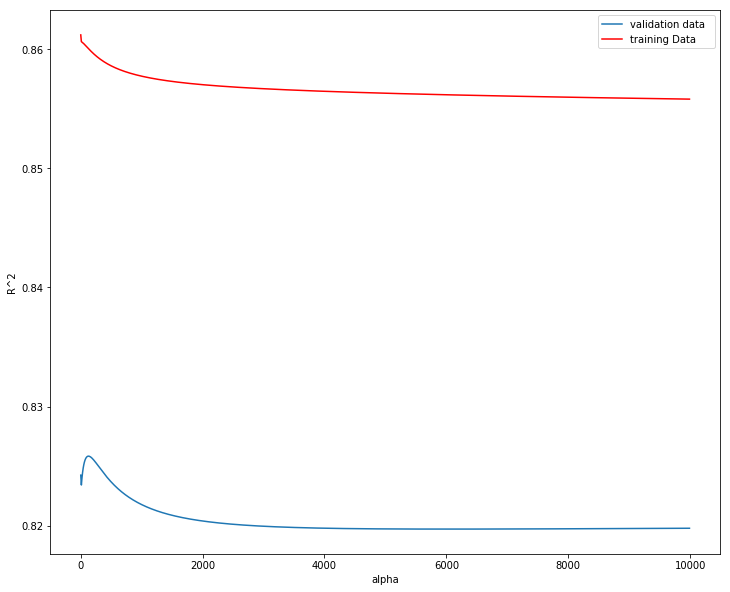

In [48]:
plt.figure(figsize=(12, 10))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [49]:
#menggunakan alpha 10
RigeModel1 = Ridge(alpha=10)
RigeModel1.fit(x_train_pr, y_train)
RigeModel1.score(x_test_pr, y_test)

0.8234194740593537

In [50]:
#menggunakan Grid Search
from sklearn.model_selection import GridSearchCV

In [59]:
parameters1 = [{'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000], 'normalize':[True,False]}]
parameters1

[{'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000],
  'normalize': [True, False]}]

In [60]:
RR=Ridge()

In [61]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [62]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000], 'normalize': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
BestRR=Grid1.best_estimator_

In [64]:
BestRR

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [65]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8205078913208559